# Exploratory Data Analysis 

## 1. Import libraries & read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.1. Read data

In [2]:
train = pd.read_csv("house_prices/train.csv")
test = pd.read_csv("house_prices/test.csv")

### 1.2. Check data's shape

In [3]:
print(f"Training set's shape: {train.shape}")
print(f"Test set's shape: {test.shape}")

Training set's shape: (1460, 81)
Test set's shape: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Overview of data

### 2.1. Training set information

In [5]:
# Thông tin các cột: kiểu dữ liệu, non-null
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2.2. Basic statistics for training set columns

In [6]:
# Thống kê cơ bản cho các cột số
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3. Check missing data for each column

### 3.1. Calcute the missing data in each column

In [7]:
missing = train.isnull().sum()
print(missing)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### 3.2. Sort the missing data

In [8]:
# Sắp xếp từ cao xuống thấp
missing[missing > 0].sort_values(ascending=False)
print(missing[missing > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


## 4. Target variable distribution (SalePrice)

### Hình 4.1. SalePrice Distribution

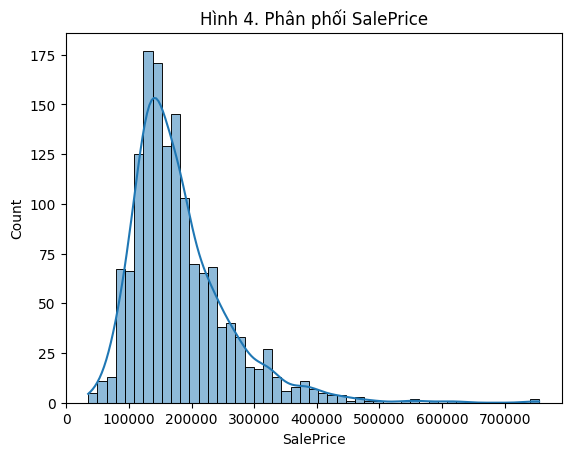

In [9]:
# Từ cột "SalePrice" trong training set tạo biểu đồ cột
# ~ kde=True giúp tạo đường cong mật độ xác suất cho biểu đồ
sns.histplot(train["SalePrice"], kde=True)

plt.title("Hình 4. Phân phối SalePrice")
# Show biểu đồ ra
plt.show()

# 5. Analyze correlation with 'SalePrice'

Objective: Find which numeric columns are most strongly correlated with SalePrice.
+ Calculate only numeric columns in the DataFrame – that is, remove all columns containing text (object), category, datetime, etc.
+ corr() calculates the correlation coefficient (default: 'Pearson') between numeric columns.
+ Pearson correlation coefficient is a statistical index that measures the degree of linearity between two continuous variables.

It is denoted by r, and its value is in the range: −1 ≤ r ≤ 1

### 5.1. Columns with correlation coefficients with 'SalePrice'

In [10]:
correlation = train.corr(numeric_only=True) # default: method='pearson'

# chuyển correlation thành DataFrame để print cho dễ nhìn
corr_df = pd.DataFrame(correlation)
print(f"Các cột có hệ số tương quan với 'SalePrice': \n{corr_df}")

Các cột có hệ số tương quan với 'SalePrice': 
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.00

### 5.2. Top 20 columns with the largest correlation coefficient with 'SalePrice'

In [11]:
top_corr = correlation['SalePrice'].sort_values(ascending=False)

print(f"Top 20 columns with the largest correlation coefficient with 'SalePrice': \n{top_corr[:20]}")

Top 20 columns with the largest correlation coefficient with 'SalePrice': 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


# 6. Check some important features

Select 2 features with the largest correlation coefficient with SalePrice.

In the boxplot, the data is divided as follows:
+ Box: represents the range between 25% and 75% (Q1 to Q3) - also known as the interquartile range (IQR).
+ The middle line of the box: is the median.
+ "Whiskers": extends to values within the range: [Q1−1.5×IQR,Q3+1.5×IQR]
+ Round points outside the whiskers: are outliers, meaning data points that are too low or too high beyond that range.

### Hình 6.1: Correlation between OverallQual and SalePrice

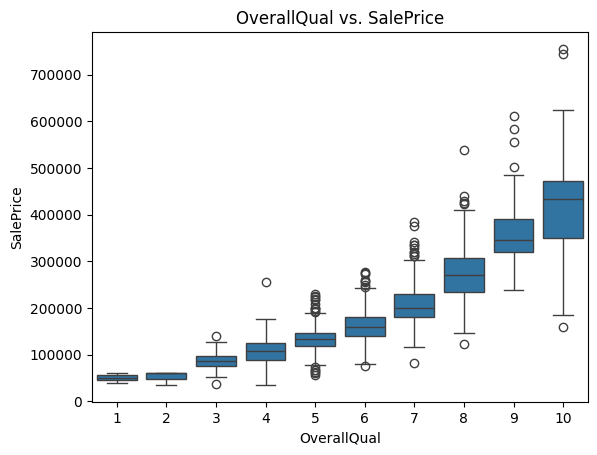

In [12]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)
plt.title("OverallQual vs. SalePrice")
plt.show()

### Hình 6.2: Correlation between GrLivArea and SalePrice

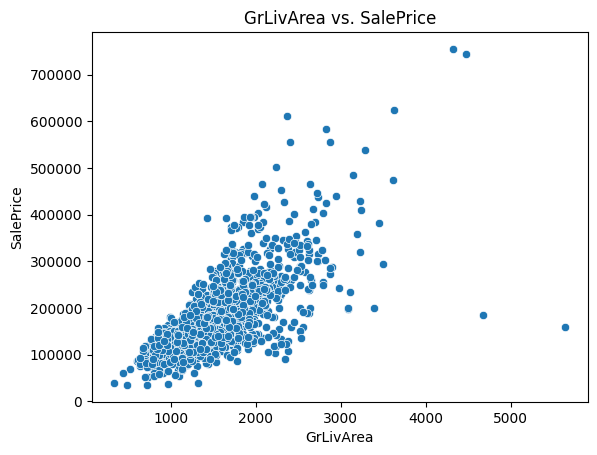

In [13]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)
plt.title("GrLivArea vs. SalePrice")
plt.show()